Create a fake signal with three time-varying freq components

In [1]:
ENV["PYTHON"]="python"
Pkg.build("PyCall")

INFO: Building Conda
INFO: Building PyCall
INFO: PyCall is using python (Python 2.7.13) at /usr/bin/python, libpython = /usr/lib64/libpython2.7
INFO: /home/data/.julia/v0.6/PyCall/deps/deps.jl has been updated
INFO: /home/data/.julia/v0.6/PyCall/deps/PYTHON has been updated


In [4]:
τ = linspace(0,1000,10000)

comp1 = 0.5*sin.(10τ) # high freq
comp2 = sin.(τ)     # low freq
comp3 = 10sin.(0.01τ)         # linear trend)
comps = [comp1, comp2, comp3]
noise = 0.1rand(τ);
signal = .+(comps...) #.+ noise;
signal .-= mean(signal);

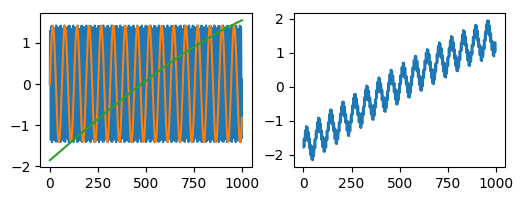

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f7155397a90>

In [7]:
using PyPlot, StatsBase
figure(figsize=(6,2))
subplot(121)
[plot(zscore(c[1:1000])) for c in comps]
subplot(122)
plot(zscore(signal[1:1000]))

In [8]:
using Images
reload("EmpiricalModeDecomposition")

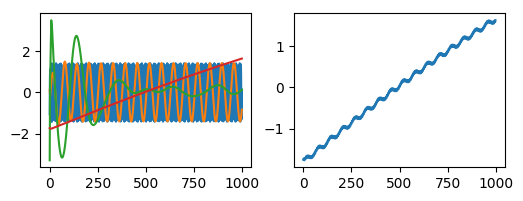

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f71496b0b10>

In [21]:
imfs = EmpiricalModeDecomposition.IMF(signal, toldev=0.01, tolzero=0.001, maxorder=4, 
    verbose=false, N=5)
figure(figsize=(6,2))
subplot(121)
for i in 1:size(imfs,2)
    plot(zscore(imfs[1:1000,i])) 
end

subplot(122)
plot(zscore(sum(imfs[1:1000,:],2)))

In [10]:
@time imfs = EmpiricalModeDecomposition.IMF(rand(1000));

  0.077614 seconds (13.97 k allocations: 3.961 MiB)


In [24]:
# install python emd
using PyCall
unshift!(PyVector(pyimport("sys")["path"]),"/ddLab/code/amorley/py/PyEMD")
@pyimport PyEMD.EMD as EMD
emd = EMD.EMD(N=4)
IMFs = emd(signal)

In [26]:
emd = EMD.EMD(N=4)
IMFs = emd(signal)

5×10000 Array{Float64,2}:
 -0.23831    0.309735   0.433813  …   0.534241    0.42745     0.0534674
 -0.586889  -0.596877  -0.569115      0.856649    0.847363    0.804158 
  0.251461   0.252348   0.251297     -0.0777703  -0.0741471  -0.06978  
 -7.90225   -7.90692   -7.91134      -8.05698    -8.063      -8.0688   
  6.63681    6.63314    6.62947       0.676395    0.676017    0.675638 

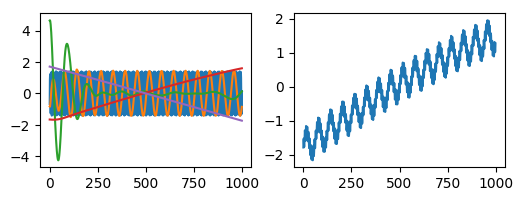

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f714959c3d0>

In [27]:
imfs = IMFs'

figure(figsize=(6,2))
subplot(121)
for i in 1:size(imfs,2)
    plot(zscore(imfs[1:1000,i])) 
end

subplot(122)
plot(zscore(sum(imfs[1:1000,:],2)))

In [ ]:
1

In [ ]:
@pyimport PyEMD.EEMD as EEMD
emd = EEMD.EEMD(N=4)
IMFs = emd(signal)

imfs = IMFs'

figure(figsize=(6,2))
subplot(121)
for i in 1:size(imfs,2)
    plot(zscore(imfs[1:1000,i])) 
end

subplot(122)
plot(zscore(sum(imfs[1:1000,:],2)))